In [1]:
import numpy as np
from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io

import nelpy as nel  # recommended import for nelpy
import nelpy.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

from nelpy import EpochArray, AnalogSignalArray, SpikeTrainArray, BinnedSpikeTrainArray

In [2]:
nel

<module 'nelpy' from '/home/shayok/Documents/Code/nelpy/nelpy/__init__.py'>

# TODO
1. Change ydata from 
1. Look at SpikeTrainArray<br>
1. Implement remaining "Stuff to add" <br>
1. Scrutinize ASA in terms of efficiency and check for obvious improvements<br>
1. Push changes!<br>
1. Add in Trodes data extraction <br>

# Stuff to add
- support single values ASA([1]) -- DONE!<br>
- empty values ASA([]) -- FIXED!<br>
- out of bounds errors! -- FIXED!<br>
- Subset functionality https://github.com/eackermann/nelpy/issues/126 -- DONE!<br>
- mean, std, min, max, with axis flag https://github.com/eackermann/nelpy/issues/127 -- DONE!<br>
- empty object pattern and attributes....https://github.com/eackermann/nelpy/issues/85

# Bugs found
- Time for multidimensional data without timestamps or time stamps in seconds provided may not have been calculated correctly -- FIXED <br><br>

# Basic AnalogSignalArray Functionality

## Just tryin to break it a lil bit

In [3]:
my_lfp = AnalogSignalArray([])
# my_lfp.ydata
# my_lfp.support
my_lfp

<empty AnalogSignal at 0x7fd999170b70>

In [4]:
moo = [1,2,3]
print(np.asarray(moo).shape)
moo = np.squeeze(moo).astype(float)
moo = np.array(moo,ndmin=2)
moo.shape

(3,)


(1, 3)

In [5]:
asa = AnalogSignalArray([1,2,3])
asa.support.duration

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1476: UserWarning: support created with given ydata! support is entire signal


2.0

In [6]:
asa = AnalogSignalArray([[1],[2],[3]])
print(asa.mean())
print(asa.std())
print(asa.min())
print(asa.max())
asa

[ 2.]
[ 0.81649658]
[ 1.]
[ 3.]


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1476: UserWarning: support created with given ydata! support is entire signal


<AnalogSignalArray at 0x7fd96b25f860: 3 signals> for a total of 2 seconds

In [7]:
asa2 = AnalogSignalArray([[1,2],[2,2],[3,2]])
asa2[EpochArray([2,3])]

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1476: UserWarning: support created with given ydata! support is entire signal
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:63: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:63: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:827: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:63: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:827: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:63: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1030: UserWarning: sampling rates are different; intersecting along time only and throwing away fs
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1518: UserWarning: Support specified i

<empty AnalogSignal at 0x7fd96b25f6d8>

In [8]:
cow = np.array([[1,3],[2,3]])
np.zeros([0]).shape

(0,)

In [9]:
cow = nel.SpikeTrainArray([[1,2,3],[4.5]], support=EpochArray(empty=True))
cow.time


array([], shape=(2, 0), dtype=float64)

In [10]:
asa = nel.AnalogSignalArray([[3,4,5],[5,6,7]], tdata=[2,3,4], support=nel.EpochArray(empty=True))
print(asa.ydata)

[]


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1518: UserWarning: Support specified is empty
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1439: UserWarning: support created with specified epoch array but no specified sampling rate
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1441: UserWarning: Support is empty. Empty AnalogSignalArray returned


## Ting Data

In [11]:
tingData = scipy.io.loadmat("/home/shayok/Downloads/simiplified(Newton, 2015-03-11_15-09-22).mat")
eeg = tingData["eeg"]
eegTimeStamps = tingData["eegtimestamp"]

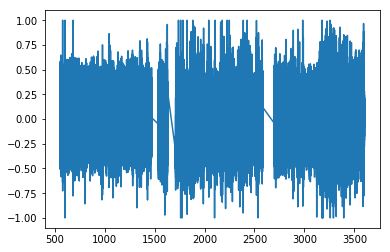

In [12]:
plt.plot(eegTimeStamps, eeg)
plt.show()

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1450: UserWarning: support created with just tdata! no sampling rate specified so support is entire range of signal
/home/shayok/Documents/Code/nelpy/nelpy/utils.py:144: UserWarning: some steps in the data are smaller than the requested step size.


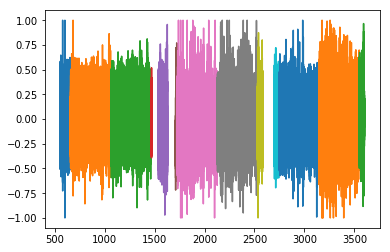

<AnalogSignalArray at 0x7fd950d21358: 5665280 signals (13 segments)> for a total of 46:24:593 minutes

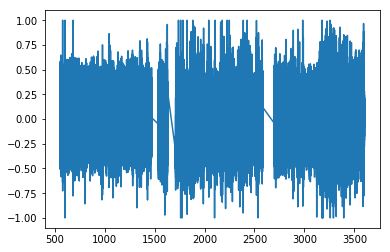

In [13]:
my_time_series = AnalogSignalArray([eeg],tdata=eegTimeStamps,)
npl.plot(my_time_series)
plt.show()
plt.plot(eegTimeStamps, eeg)
my_time_series

In [14]:
my_time_series.support.durations

array([ 105.69602911,  402.65272911,  402.65282911,    5.28442911,
         92.35812911,   14.09242911,  402.65282911,  402.65282911,
         54.86102911,   44.54312911,  402.90442911,  402.65272911,
         51.58952911])

In [15]:
my_time_series.support.merge(gap=0.1)

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:63: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:827: UserWarning: meta data is not available


<EpochArray at 0x7fd950d21d30: 4 epochs> of duration 46:24:597 minutes

In [16]:
my_time_series._support = my_time_series.support.merge(gap=0.1)
my_time_series.support.durations

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:63: UserWarning: No sampling frequency has been specified!
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:827: UserWarning: meta data is not available


array([ 916.28722911,   92.35812911,  874.26022911,  901.69102911])

In [17]:
my_time_series

<AnalogSignalArray at 0x7fd950d21358: 5665280 signals (4 segments)> for a total of 46:24:597 minutes

## My Data

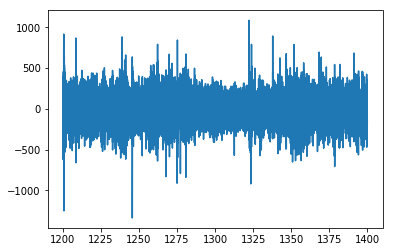

In [18]:
myFile = np.load('/home/shayok/Downloads/LFP.npz')
lfp = myFile['dataT2C1']*0.195
onlineRippleDetect = myFile['onlineRippleDetect']
offlineRippleDetect = myFile['offlineRippleDetections']
timeStampsSeconds = myFile['timeStampsSeconds']
timeStamps = myFile['timeStamps']
plt.plot(timeStampsSeconds,lfp)
plt.show()

In [19]:
my_lfp = AnalogSignalArray([lfp],tdata=timeStamps,fs=30000,step=10)
print("Mean")
print(my_lfp.mean())
print(np.mean(np.transpose([lfp,onlineRippleDetect]),axis=0))
print("Standard Deviation")
print(my_lfp.std())
print(np.std(np.transpose([lfp,onlineRippleDetect]),axis=0))
print("min")
print(my_lfp.min())
print(np.amin(np.transpose([lfp,onlineRippleDetect]),axis=0))
print("max")
print(my_lfp.max())
print(np.amax(np.transpose([lfp,onlineRippleDetect]),axis=0))

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1426: UserWarning: support created with given tdata and sampling rate, fs!


Mean
[-0.1089335]
[-0.1089335   0.63333333]
Standard Deviation
[ 135.26496947]
[ 135.26496947   56.26957931]
min
[-1338.87]
[-1338.87     0.  ]
max
[ 1087.905]
[ 1087.905  5000.   ]


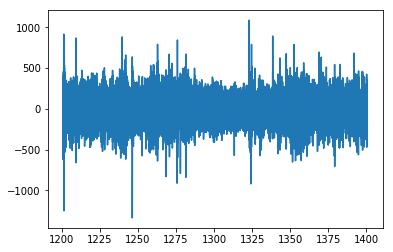

In [20]:
npl.plot(my_lfp)

In [21]:
etiennes_lfp=AnalogSignalArray([[1,5],[2,5,],[3,5]])
etiennes_lfp.min()

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1476: UserWarning: support created with given ydata! support is entire signal


array([ 1.,  2.,  3.])

In [22]:
my_lfp.n_signals

600000

<EpochArray at 0x7fd9530631d0: 4 epochs> of duration 1:54 minutes


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


<AnalogSignalArray at 0x7fd9530630f0: 340010 signals (4 segments)> for a total of 1:54 minutes

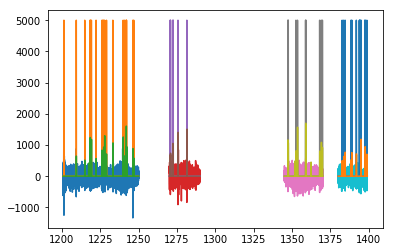

In [23]:
partialSupport = EpochArray([[1200,1250], [1270,1290], [1345,1370],[1380,1399]],fs=1)
my_lfp = AnalogSignalArray([lfp,onlineRippleDetect,offlineRippleDetect],tdata=timeStamps,support=partialSupport,fs=30000,step=10)
npl.plot(my_lfp)
print(my_lfp.support)
my_lfp

In [24]:
my_lfp._ydata.shape

(3, 340010)

In [25]:
my_lfp.support.durations

array([ 50.,  20.,  25.,  19.])

In [26]:
my_lfp.n_epochs

4

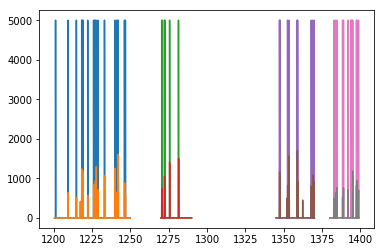

In [27]:
npl.plot(my_lfp._subset([1,2]))

[array([ -0.21025995,   0.12837231,  47.93591353]), array([  0.16328703,   0.09999833,  35.11043538]), array([  0.06707391,   0.1199984 ,  53.05299594]), array([  0.1435688 ,   0.22806617,  44.77124007])]
<EpochArray at 0x7fd9530631d0: 4 epochs> of duration 1:54 minutes
<AnalogSignalArray at 0x7fd952f3fd68: 340010 signals (4 segments)> for a total of 1:54 minutes


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an e

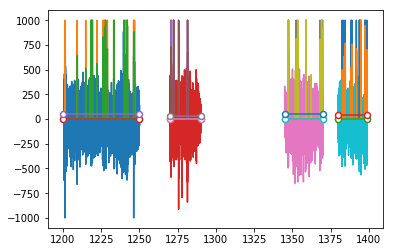

In [28]:
clipped_lfp = my_lfp.clip(-1000,1000)
npl.plot(clipped_lfp)
means = [snippet.mean() for snippet in clipped_lfp]
print(means)
print(clipped_lfp.support)
print(clipped_lfp)
npl.plot(clipped_lfp.support, means)

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:827: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:827: UserWarning: meta data is not available
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


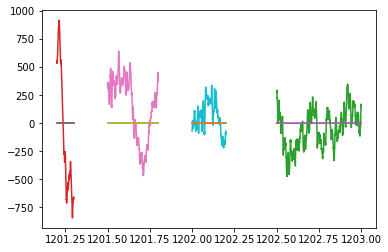

In [29]:
partialSupportForEtienne = EpochArray([[1200,1200.5], [1201.2,1201.3], [1201.5,1201.8],
                                       [1202,1202.2], [1202.5,1203]],fs=1)
mySuperRestrictedLFP = clipped_lfp[partialSupportForEtienne]
npl.plot(mySuperRestrictedLFP)

In [30]:
print(mySuperRestrictedLFP.n_signals, mySuperRestrictedLFP.n_epochs)
print(mySuperRestrictedLFP.ydata.shape)
print(mySuperRestrictedLFP.mean(), np.mean(mySuperRestrictedLFP.ydata,axis=0))
print(np.mean(mySuperRestrictedLFP.ydata,axis=1).shape)

3304 5
(3, 3304)
[ 17.10528904   0.           0.        ] [ 185.185  180.765  179.01  ...,   54.535   49.725   47.19 ]
(3,)


/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


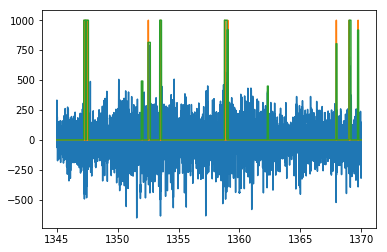

In [31]:
mynewlfp = clipped_lfp[2]
npl.plot(mynewlfp)

In [32]:
[snippet.ydata.argmax() for snippet in clipped_lfp]

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1538: UserWarning: ignoring signal outside of support
/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1539: FutureWarning: comparison to `None` will result in an e

[149974, 61517, 81775, 64834]

# Random

In [33]:
cow = np.array([[1,3,3],[3,1,3],[3,1,3],[3,1,1]])
cow.transpose().shape[0]

3

In [34]:
cow.shape,cow.size

((4, 3), 12)

In [35]:
cow[:,[0,1]]

array([[1, 3],
       [3, 1],
       [3, 1],
       [3, 1]])

In [36]:
cmoo = "%s cows %s moos" %(4,56)
print(cmoo)

4 cows 56 moos


In [37]:
moo = np.squeeze(cow)
moo.shape

(4, 3)

In [38]:
try:
    if(timeStamps.shape[1]==cow.shape[1]):
        print("moo")
except:
    print("heyy")

heyy


In [39]:
moo = [1,3,45]
moo = np.squeeze(moo).astype(float)
moo = np.array(moo, ndmin=2)
moo.shape

(1, 3)

In [40]:
np.zeros([0,3]).shape

(0, 3)

# Interpolation

In [41]:
print(timeStamps[0])
print(timeStamps[1])

36019940
36019950


In [42]:
cow1 = []
cow1.append("moo")

In [43]:
interpObj = interpolate.interp1d(timeStampsSeconds, lfp)

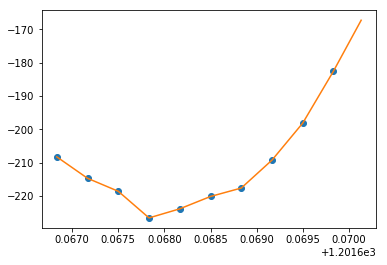

In [44]:
xnew = np.arange(timeStampsSeconds[5000],timeStampsSeconds[5010],1/30000)
ynew = interpObj(xnew)
plt.plot(timeStampsSeconds[5000:5010], lfp[5000:5010],'o',xnew,ynew,'-')
plt.show()

In [45]:
print(my_lfp.ydata.T[5000],lfp[5000])

[-208.26    0.      0.  ] -208.26


In [46]:
my_lfp = AnalogSignalArray([lfp],tdata=timeStampsSeconds,)
my_lfp

/home/shayok/Documents/Code/nelpy/nelpy/objects.py:1450: UserWarning: support created with just tdata! no sampling rate specified so support is entire range of signal
/home/shayok/Documents/Code/nelpy/nelpy/utils.py:144: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x7fd952f31fd0: 600000 signals> for a total of 3:19:1000 minutes

In [47]:
print(np.min(xnew),np.max(xnew))

1201.66683333 1201.67013333


In [48]:
print(timeStampsSeconds[1993])
print(my_lfp.time[3000])
print(my_lfp.time[4000])

1200.6645
1201.00016667
1201.3335


In [49]:
print(my_lfp.tdata[0]/30000,timeStamps[0]/30000,timeStampsSeconds[0])

0.0400000055556 1200.66466667 1200.00016667


(100,)
(1, 100)


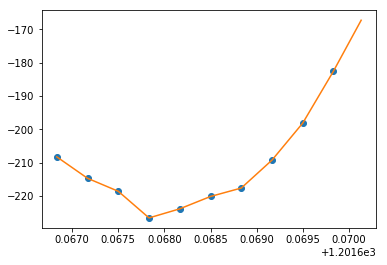

In [50]:
ytestnew = my_lfp.interp(xnew)
print(xnew.shape)
print((ytestnew).shape)
plt.plot(my_lfp.time[5000:5010], my_lfp.ydata[:,5000:5010].T,'o',xnew,np.squeeze(ytestnew),'-')
plt.show()